In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.analysis import rms, diffusionmap, align
from MDAnalysis.analysis.distances import dist
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA


In [10]:
md_universe = mda.Universe(str("./Final_topology_50ns_NoCutoff_2.pdb"), str("./Final_trajectory_50ns_NoCutoff_2.xtc"))

/home/media/data2/user_home/dbsejrgus226/miniconda3/envs/MD/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:276: UserWarning: PDB file is missing resid information.  Defaulted to '1'
  warnings.warn("PDB file is missing resid information.  "


In [11]:
# Set trajectory pointer to first frame as reference
md_universe.trajectory[0]

# in_memory=True is needed to actually modify the loaded trajectory
# if the trajectory is too big for memory, one can write out the aligned trajectory and reload it into a new universe
alignment = align.AlignTraj(
    mobile=md_universe, reference=md_universe, select="protein", in_memory=True
)
alignment.run()

In [12]:
def rmsd_for_atomgroups(universe, selection1, selection2=None):
    """Calulate the RMSD for selected atom groups.

    Parameters
    ----------
    universe: MDAnalysis.core.universe.Universe
        MDAnalysis universe.
    selection1: str
        Selection string for main atom group, also used during alignment.
    selection2: list of str, optional
        Selection strings for additional atom groups.

    Returns
    -------
    rmsd_df: pandas.core.frame.DataFrame
        DataFrame containing RMSD of the selected atom groups over time.
    """

    universe.trajectory
    ref = universe
    rmsd_analysis = rms.RMSD(universe, ref, select=selection1, groupselections=selection2)
    rmsd_analysis.run()

    columns = [selection1, *selection2] if selection2 else [selection1]
    #print(rmsd_analysis.results)
    #print(rmsd_analysis)
    rmsd_df = pd.DataFrame(np.round(rmsd_analysis.results.rmsd[:, 2:], 2), columns=columns)
    rmsd_df.index.name = "time"
    return rmsd_df

In [13]:
rmsd = rmsd_for_atomgroups(md_universe, "backbone", ["protein", "resname UNK"])
#rmsd[:20]

In [14]:
rmsd.rename(columns={"resname UNK": "rank_2_ligand"}, inplace=True)
rmsd.head()

,backbone,protein,rank_2_ligand
time,,,
0,0.00,0.00,0.00
1,0.68,0.88,0.71
2,0.77,0.98,1.48
3,0.86,1.09,2.20
4,0.87,1.13,1.81


In [15]:
rmsd.to_csv("./df_rank2_rmsd.csv", index=False)

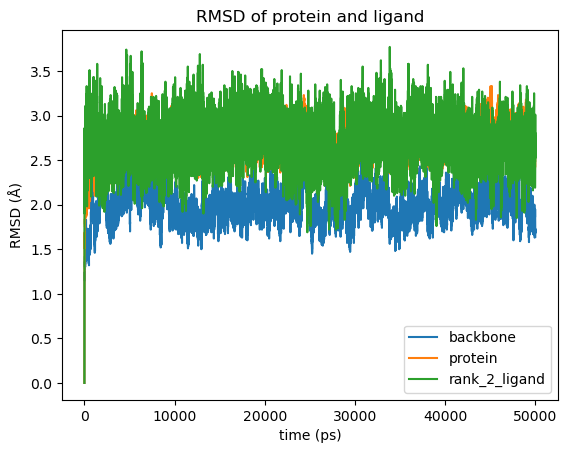

In [16]:
# top 2 for 50 ns
rmsd.plot(title="RMSD of protein and ligand")
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)");
plt.savefig("final_rank2_rmsd_for50ns_results") 

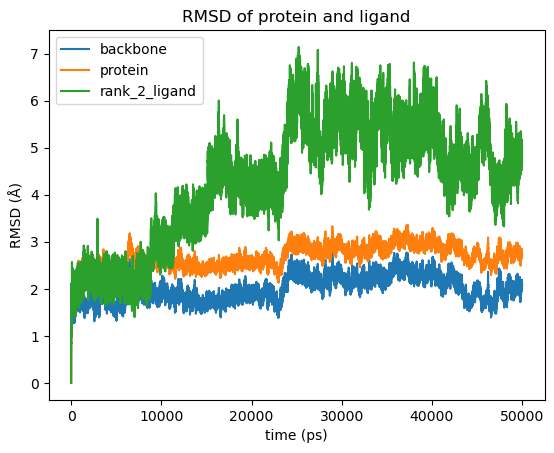

In [8]:
# top 2 for 50 ns
rmsd.plot(title="RMSD of protein and ligand")
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)");
plt.savefig("final_rank2_rmsd_for50ns_twice_results") 

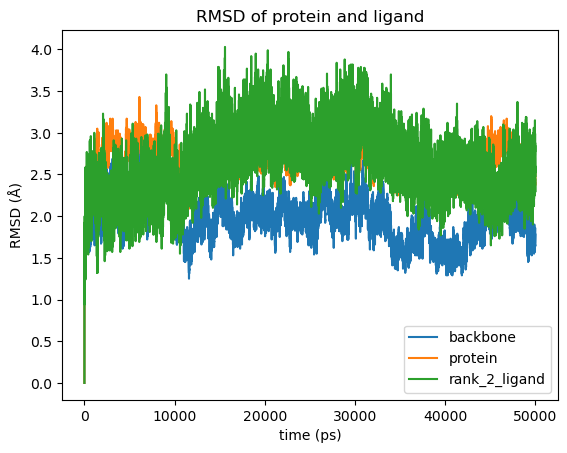

In [7]:
# top 10 for 50 ns
rmsd.plot(title="RMSD of protein and ligand")
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)");
#plt.savefig("final_rank10_rmsd_for50ns_results") 

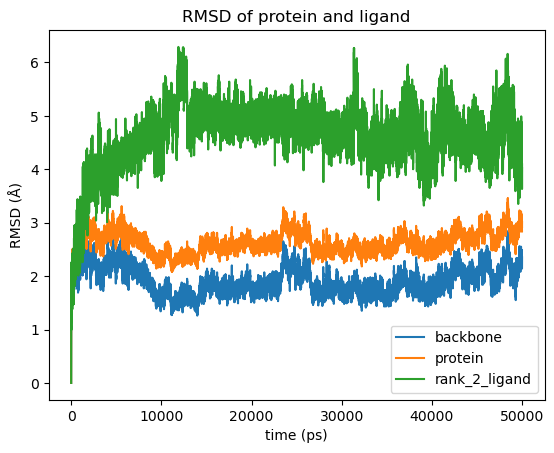

In [8]:
# top 8 for 50 ns
rmsd.plot(title="RMSD of protein and ligand")
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)");
plt.savefig("final_rank8_rmsd_for50ns_results") 

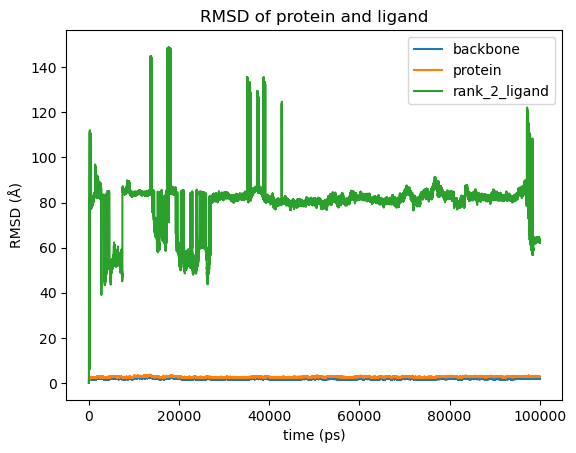

In [11]:
# 300 kelvin
rmsd.plot(title="RMSD of protein and ligand")
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)");
plt.savefig("rank2_rmsd_results") 

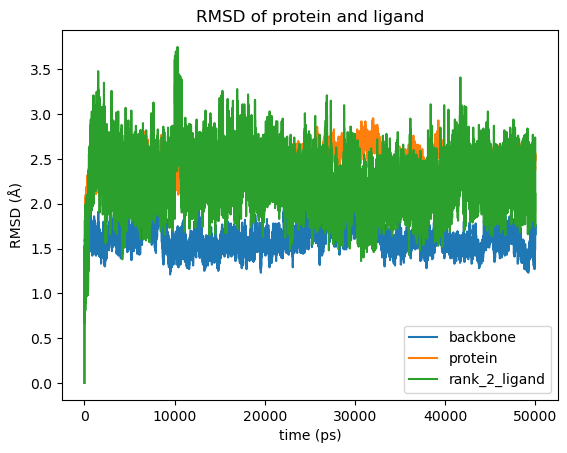

In [7]:
# 50 ns
rmsd.plot(title="RMSD of protein and ligand")
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)");
plt.savefig("rank2_rmsd_results")

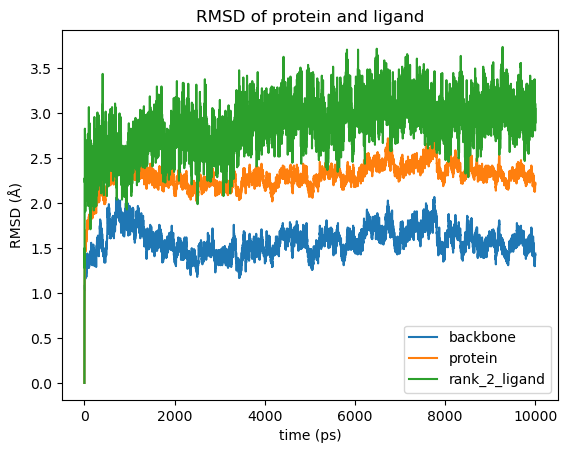

In [8]:
# 10 ns
rmsd.plot(title="RMSD of protein and ligand")
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)");
plt.savefig("rank2_rmsd_results")

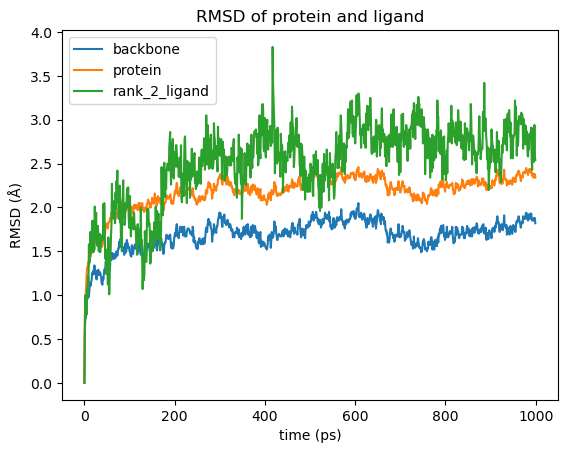

In [33]:
# 1 ns
rmsd.plot(title="RMSD of protein and ligand")
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)");
plt.savefig("rank2_rmsd_results")

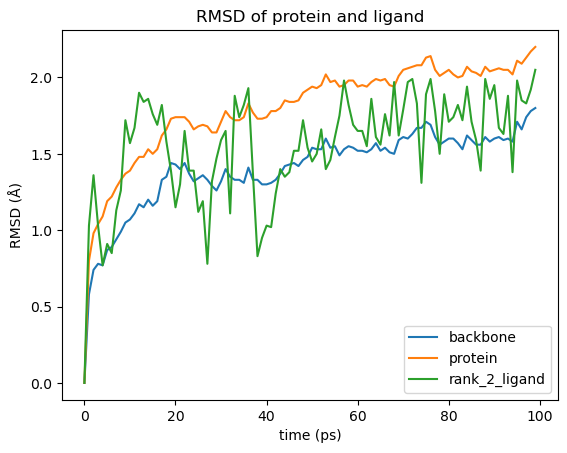

In [26]:
rmsd.plot(title="RMSD of protein and ligand")
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)");
plt.savefig("rank2_rmsd_results")

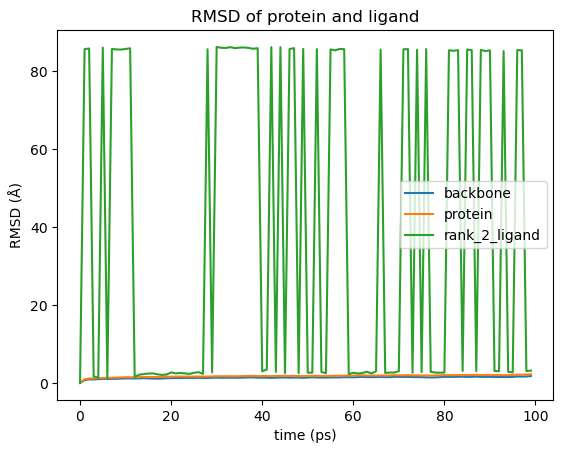

In [20]:
rmsd.plot(title="RMSD of protein and ligand")
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)");
plt.savefig("rank2_rmsd_results")

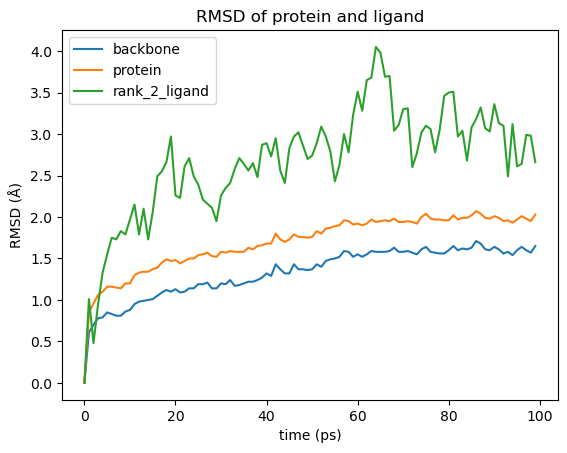

In [14]:
rmsd.plot(title="RMSD of protein and ligand")
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)");
plt.savefig("rank2_rmsd_results")

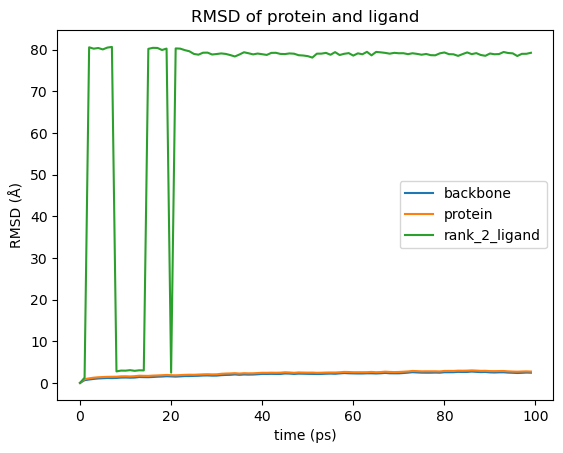

In [7]:
rmsd.plot(title="RMSD of protein and ligand")
plt.xlabel("time (ps)")
plt.ylabel("RMSD (Å)");
plt.savefig("rank2_rmsd_results")